In [8]:
from big_helper import *
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from math import prod
from tqdm import tqdm

name = 'baby'
num = 36
size = (28,28)
N = prod(size)
make_bw = True

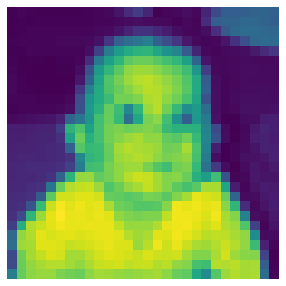

In [9]:
imgs = get_images(name, num, size) 
if name == 'TEXCOL':
    imgs = [img[0] for img in imgs] # 0 img, 1 colour mask, 2 texture mask


if make_bw == True:
    imgs = [rgb2gray(img) for img in imgs]

plt.rcParams["figure.figsize"] = (5,5)
plot_images(imgs)

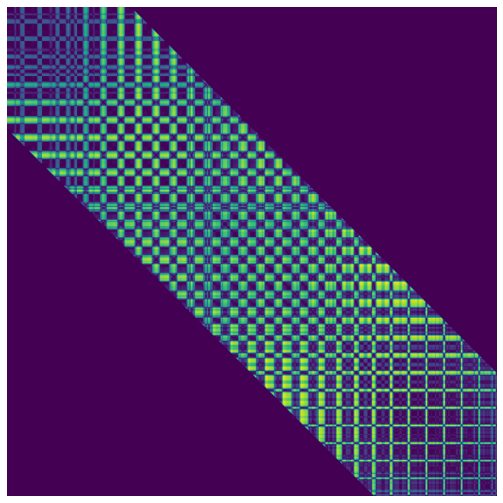

In [16]:
radius = N // 4
sigmaI = 0.1
sigmaX = 0.5

choice = 1
choices = ["manual_weights_binary", "manual_weights_abs", "intensity_weight_matrix", "weights_2", 
           "positional_weight_matrix", "intens_posit_wm", "weight_tot", "weight_int", "weight_dist",
           "generic_weight+texture", "generic_weight+colour", "generic_weight_noexp+texture", "generic_weight_noexp+colour",
           "generic_weight_rawfunc+texture", "generic_weight_rawfunc+colour", "manual_weights_abs_upper"]

singleImage = False

# TODO: fix weight int and the new ones :)

if singleImage:
    labels = []
    weights = []
    for i in tqdm(range(16)):
        labels.append(choices[i])
        weights.append(get_weights(imgs[0], i, radius, sigmaI, sigmaX))
else:
    labels = None
    weights = [get_weights(img, choice, radius, sigmaI, sigmaX) for img in imgs]
    
plt.rcParams["figure.figsize"] = (9,9) # specify the size for this cell
plot_images(weights, labels)

(784, 784)


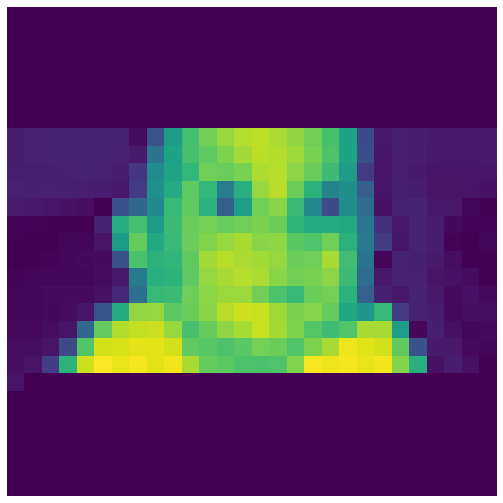

In [11]:
# plot a weight row as an image... should highlight the similar pixels
print(weights[0].shape)

row = N // 2
images = []
for weight in weights:
    images.append(weight[row].reshape(size))
    
plot_images(images, labels) 

row = N // 4
images = []
for weight in weights:
    images.append(weight[row].reshape(size))

plt.rcParams["figure.figsize"] = (9,9) # specify the size for this cell
# plot_images(images, labels) 

row = round(0.9 * N)
images = []
for weight in weights:
    images.append(weight[row].reshape(size))

plt.rcParams["figure.figsize"] = (9,9) # specify the size for this cell
# plot_images(images, labels) 

In [12]:
example = [norm_weights, ]

In [15]:
# quick and dirty solve test
from big_helper import get_eigensolvers

standard, generalized = get_eigensolvers()

vals = []
vecs = []
labels = []
for W in weights:
    print(W.shape)
    d = np.sum(W,0)
    D = np.diag(d)
    
    for name, func in generalized.items():
        try:
            val, vec = func((D-W), D)
            print(name)
            vals.append(val[0])
            vecs.append(vec[0].reshape(size))
            labels.append(name)
        except Exception as err:
            print(f'{name } : {err}')
            continue

(784, 784)
g_eig
g_eigh_cff : The leading minor of order 784 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.
g_eigh_gv : The leading minor of order 784 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.
g_eigh_gvd : The leading minor of order 784 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.
g_eigh_gvx_05 : The leading minor of order 784 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.
g_eigh_gvx_inf10 : The leading minor of order 784 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.


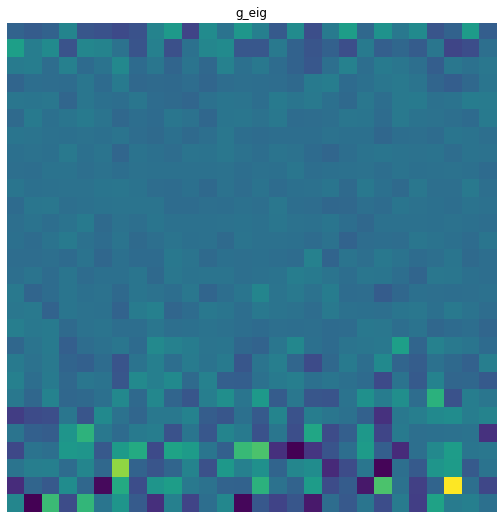

In [ ]:
plot_images(vecs, labels)

In [ ]:
# also do lobpcg by hand since it needs an approximation vector X also included
# can do generalized and standard forms.
# lobpcg(A,X,B) or lobpcg(A,X), depending on the inputs feed to it :)

# import scipy.sparse.linalg as sparse

# np.random.seed(0)
# X_2 = np.random.uniform(size=(N, 2))
# X_10 = np.random.uniform(size=(N, 10))

# A = B = X_2 # just so code wont complain for now
# # A = (D-W)
# # B = D

# generalized = True

# if generalized:
#     w_1,v_1 = sparse.lobpcg(A, X_2, B, largest=False)
#     w_2, v_2 = sparse.lobpcg(A, X_10, B, largest=False)
# else:
#     w_1, v_1 = sparse.lobpcg(A, X_2, largest=False)
#     w_2, v_2 = sparse.lobpcg(A, X_10, B, largest=False)


In [ ]:
# different valid image sets
# (real images too?)

# different weighting functions
# intens, position, affinity, intens * position...

# plot specific rows of the weights matrix (e.g. for intensity should show similar things in image)

# different weightings with W/np.max(W) (e.g. do we normalize the weights before doing laplace?)

# different laplace solvers
# cheap, expensive, symmetric/none...
# how to handle 0's in D? or... how to handle 0's in d?

# different eigensolvers
# initially try for just one eig solver?
# Time the eigensolvers

# linalg.eig(L)
# np.eig(L)

# linalg.eigh(L)
# linalg.eig(L)
# linalg.eigh(L,D)
# linalg.eig(L,D)
# plus the gvd variants etc....

# lobpcg (specifically setup for finding small eigenvalues unlike most other methods :) )

# outputs
# and with... * 28, * eigval, * np.sqrt(D)
# sign of outputs to make it an indicator vector
# objective, eqconst

# plot the eigenvalues for a different method... (see if > 0)
# plot the eigenvectors for different inputs
# plot ncut cost, at different partitions of the eigenvector range
# ^ and do this for the first so many eigenvectors :)

# also other plots probably mentioned in eigs-test2 or nc-test2/nc-test3... etc